# Chapter 1 - Creating Features

In [1]:
import pandas as pd

In [2]:
so_survey_df = pd.read_csv('Combined_DS_v10.csv')
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [3]:
so_survey_df.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [4]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=[int, float])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [5]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [6]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [8]:
# Create a series out of the Country column
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [9]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


C:\Users\mkars\AppData\Local\Temp\ipykernel_23992\52065044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries[mask] = 'Other'


In [10]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [11]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [12]:
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


# Chapter 2 - Dealing with Messy Data

In [13]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [14]:
sub_df.head(10).isnull()

,Age,Gender
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


In [15]:
sub_df.head(10).notnull()

,Age,Gender
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,False


In [16]:
so_survey_df.shape

(999, 14)

In [17]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [18]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


In [19]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


In [20]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [21]:
# Replace missing values
so_survey_df['Gender'].fillna('Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [22]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [23]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


In [24]:
# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [25]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [26]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

C:\Users\mkars\AppData\Local\Temp\ipykernel_23992\2004874406.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')


In [27]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0            NaN
2            NaN
4      £41671.00
6            NaN
8            NaN
         ...    
989          NaN
990          NaN
992          NaN
994          NaN
997          NaN
Name: RawSalary, Length: 401, dtype: object


In [28]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


In [29]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

AttributeError: Can only use .str accessor with string values!

# Chapter 3 - Conforming to Statistical Assumptions

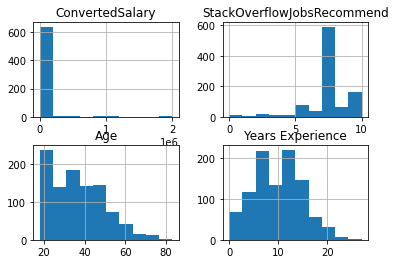

In [31]:
import matplotlib.pyplot as plt
# Create a histogram
so_numeric_df.hist()
plt.show()

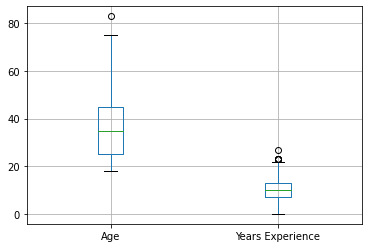

In [32]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

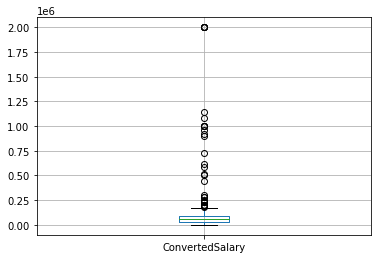

In [33]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

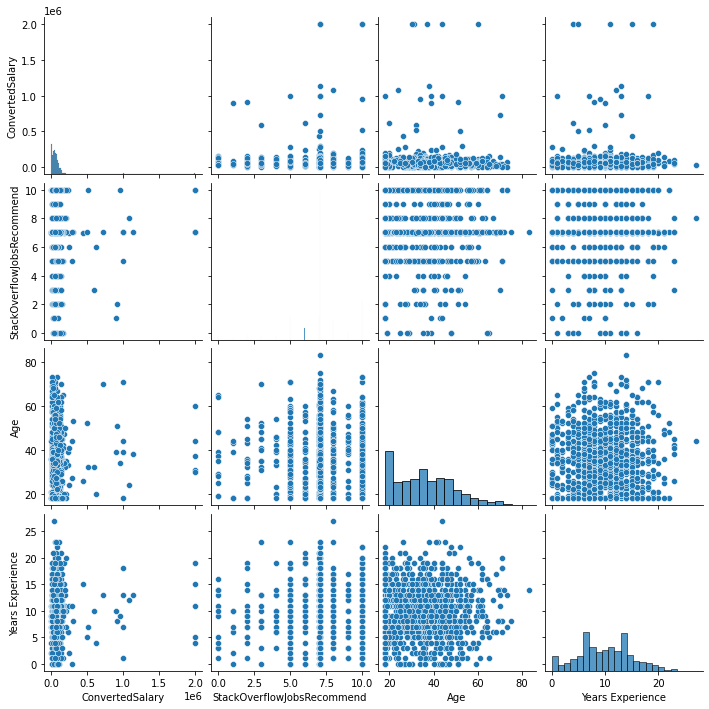

In [34]:
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(data=so_numeric_df)

# Show plot
plt.show()

In [35]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  999.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    1.829439   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    7.000000   25.000000   
50%       5.556200e+04                    7.061602   35.000000   
75%       8.823800e+04                    7.061602   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


In [36]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


In [37]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


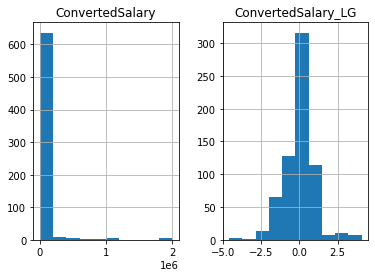

In [38]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

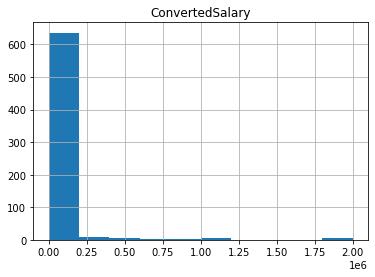

<Figure size 432x288 with 0 Axes>

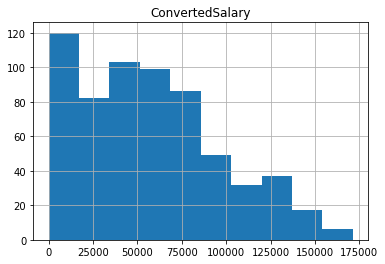

In [39]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

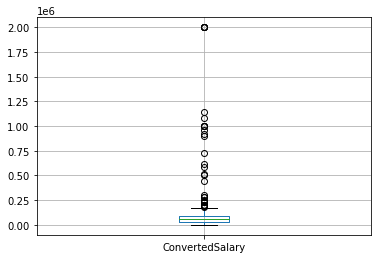

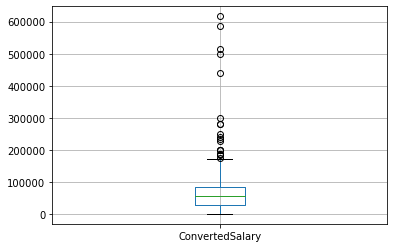

In [41]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# Original box plot
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.299, random_state=42)
so_train_numeric.shape, so_test_numeric.shape

((700, 7), (299, 7))

In [52]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
453   29 -0.527627
793   25 -0.833244
209   46  0.771247
309   18 -1.368075
740   26 -0.756840


In [53]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

# Chapter 4 - Dealing with Text Data

In [54]:
speech_df = pd.read_csv('inaugural_speeches.csv')
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [55]:
# Print the first 5 rows of the text column
print(speech_df['text'].head())

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object


In [56]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


C:\Users\mkars\AppData\Local\Temp\ipykernel_23992\3697655143.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')


In [57]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  char_cnt  word_cnt  \
0   fellow citizens of the senate and of the house...      8616      1432   
1   fellow citizens   i am again called upon by th...       787       135   
2   when it was first perceived  in early times  t...     13871      2323   
3   friends and fellow citizens   called upon to u...     10144      1736   
4   proceeding  fellow citizens  to that qualifica...     12902      2169   
5   unwilling to depart from examples of the most ...      7003      1179   
6   about to add the solemnity of an oath to the o...      7148      1211   
7   i should be destitute of feeling if i was not ...     19894      3382   
8   fellow citizens   i shall not attempt to descr...     26322      4466   
9   in compliance with an usage coeval with the ex...     17753      2922   
10  fellow citizens   about to undertake the arduo...      6818      1130   
11  fellow citizens   the will of the american peo...      7061      1179   

In [58]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


In [61]:
# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


In [62]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:  I AM again called upon by th...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:  CALLED upon to u...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...  

In [63]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133415       0.000000        0.105388   
1      0.000000              0.261016       0.266097        0.000000   
2      0.000000              0.092436       0.157058        0.073018   
3      0.000000              0.092693       0.000000        0.000000   
4      0.041334              0.039761       0.000000        0.031408   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026112      0.060460      0.000000   
3              0.0       0.090942    0.117831      0.045471      0.053335   
4              0.0       0.000000    0.067393      0.039011      0.091514   

   TFIDF_citizens  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.229644  ...    

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64


In [65]:
speech_df.shape

(58, 8)

In [66]:
train_speech_df, test_speech_df = train_test_split(speech_df, test_size=0.224, random_state=42)
train_speech_df.shape, test_speech_df.shape

((45, 8), (13, 8))

In [67]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_administration  TFIDF_america  TFIDF_american  TFIDF_americans  \
0              0.128992       0.000000        0.107153         0.000000   
1              0.000000       0.000000        0.000000         0.000000   
2              0.071099       0.199118        0.059062         0.000000   
3              0.027797       0.000000        0.069272         0.000000   
4              0.000000       0.128992        0.204061         0.053299   

   TFIDF_believe  TFIDF_best  TFIDF_business  TFIDF_citizens  TFIDF_come  \
0       0.000000    0.000000         0.00000        0.234595    0.000000   
1       0.000000    0.195259         0.00000        0.054481    0.000000   
2       0.023138    0.082388         0.06771        0.034482    0.071099   
3       0.040706    0.036237         0.00000        0.101107    0.013898   
4       0.159882    0.071164         0.00000        0.029784    0.040942   

   TFIDF_commerce  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.000

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64
